# Optical Characterization of Silicon: Swanepoel Method enhaced with Machine Learning

Explanation

## 1) Libraries

Explanation

In [1]:
# Basic libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [2]:
# Information on autoreload: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
# We import the functions from our package
from src.models import * 
from src.learning import *
import src.general as general

## 2) Generating multiple spectra

Explanation

## 3) Learning the transmission

Explanation

In [18]:
# Defining the fix variables that we do not want to learn
# Value -1 means learning non-fix variable

# For Refractive Index
n1 = -1;   n2 = -1;   n3 = -1

# For Absorption Coefficient
k1 = -1;    k2 = -1

# Thickness and wedge
thickness = -1;     wedge = 0   # Here the wedge is fix to zero 

# We include this 'fix or unfix' parameters in a vector
fix_param = np.array([n1, n2, n3, k1, k2, thickness, wedge])

In [19]:
# STEP 1. Global optimization
# Recomended to fix the thickness or edge (if known)
# Recomended aroun 125,000 iterations
global_model = global_opt(wavelength = wv, transmission = T, T_substrate = Ts, \
        model_n = 'Wemple-DiDomenico', model_k = 'Urbach')

result = global_model.iterations(fix = fix_param, n_iters = 125000)


 --- GLOBAL OPTIMIZATION ---

We will do 125000 iterations for the global optimization             (modified random search algorithm)

Iterations 1, cost: 80.294 %
Iterations 47, cost: 70.117 %
Iterations 109, cost: 56.085 %
Iterations 290, cost: 27.789 %
Iterations 617, cost: 22.569 %
Iterations 729, cost: 8.317 %
Iterations 2284, cost: 7.536 %
Iterations 5829, cost: 6.973 %
Iterations 12764, cost: 4.930 %

Global optimization result: [   3.158   35.489    1.       1.025    0.271 1103.96     0.   ]

A good global min is not found, we should repeat the algorithm:

Iterations 1, cost: 717.571 %
Iterations 2, cost: 126.292 %
Iterations 12, cost: 75.834 %
Iterations 20, cost: 60.301 %
Iterations 446, cost: 57.545 %
Iterations 456, cost: 48.536 %
Iterations 558, cost: 36.826 %
Iterations 849, cost: 33.578 %
Iterations 2429, cost: 26.031 %
Iterations 6084, cost: 19.964 %


In [20]:
# STEP 2. Local optimization
local_model = local_opt(wavelength = wv, transmission = T, T_substrate = Ts, \
        model_n = 'Wemple-DiDomenico', model_k = 'Urbach')

learning_rate = 0.01
n_iters = 5001
result_improved = local_model.iterations(result, learning_rate, n_iters)


 --- LOCAL OPTIMIZATION ---

We will do 5001 iterations for the local optimization (SGD)

epoch 0, cost = 19.96369
epoch 400, cost = 1.61101
epoch 800, cost = 1.52598
epoch 1200, cost = 1.52598
epoch 1600, cost = 1.53487
epoch 2000, cost = 1.52599
epoch 2400, cost = 1.52693
epoch 2800, cost = 1.52599
epoch 3200, cost = 1.52598
epoch 3600, cost = 1.52598
epoch 4000, cost = 1.52601
epoch 4400, cost = 1.52598
epoch 4800, cost = 1.52598
\Local optimization result: [   3.238   37.283    1.       1.       0.271 1092.748    0.   ]


## 4) Trying with a real spectrum

### 4.1. Download the real spectrum

output/Original_Vs_NIR_spectrum_1.png


0

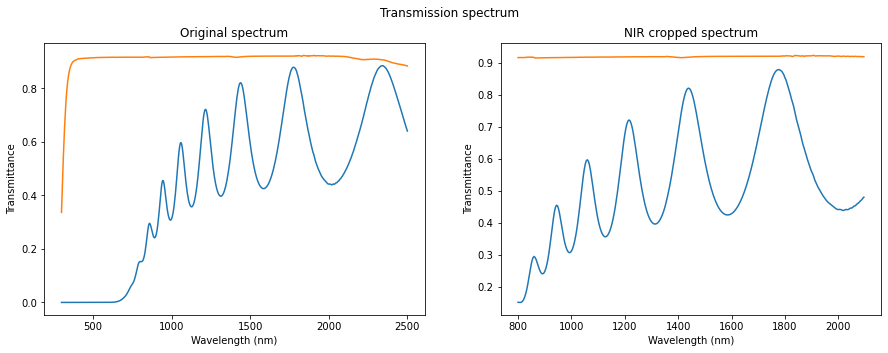

In [6]:
# Name of the TXT files that have the transmittance data for the sample and the substrate alone

type_sample = 'real'    # Either 'real' or 'simulated' spectra  
sample = 1              # For the 'real' spectra, there are 1 to 14 samples

name_Sample = 'spectrum_'+str(sample)
name_Substrate= 'Substrate_'+str(sample)


# We obtain the wavelength (wv), the sample transmission (T), and the substrate alone 
# transmisison (Ts) as torch tensors. We plot the original spectrum and the spectrum cropped to
# the NIR region and we save the plot in the output folder.

wv, T, Ts = general.load_spectra(type_sample = type_sample, name_Sample = name_Sample, \
    name_Substrate = name_Substrate)

figtitle = 'Original_Vs_NIR_' + name_Sample
general.save_fig_as_png(figtitle)

### 4.2. Applying our model

In [7]:
# Write here